## This notebook is the part of Georgetown University Data Science Project - Team Ship Happen

### Data Set Information:
This data file contains details of Marine Casualty Information. In this file the fields are separated by tab (not commas).

### Attribute Information:
gk_d_vessel, vessel_id, vessel_name, gross_ton, net_ton, vlength, vbreadth, vdepth, incident_dt, incident_yr, incident_mo, incident_dy, activity_type, activity_status, vessel_property_damage, cargo_property_damage, route_type, vessel_class, vessel_type, vessel_subtype, vessel_service, max_passengers_allowed, max_crew, vessel_age, build_year, flag_abbr, flag_desc, relationship_type, waterway_name, accident_type, casualty_type_desc, latitude, longitude.

No. of Instances: 13794


In [69]:
%matplotlib inline

import os
import json
import time
import pickle
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Data Exploration 
In this section we will begin to explore the dataset to determine relevant information.

In [70]:
df = pd.read_csv(os.path.abspath('data\MisleVslInijury_data'), sep='\t')
#df.head()
df.drop('gk_d_vessel', axis=1, inplace=True)
df.drop('vessel_id', axis=1, inplace=True)
df.drop('vessel_name', axis=1, inplace=True)
df.drop('vessel_subtype', axis=1, inplace=True)
df.drop('waterway_name', axis=1, inplace=True)
df.drop('vessel_service', axis=1, inplace=True)
df.drop('relationship_type', axis=1, inplace=True)
df.drop('flag_abbr', axis=1, inplace=True)
df.drop('flag_desc', axis=1, inplace=True)
df.drop('vessel_type', axis=1, inplace=True)
df.drop('build_year', axis=1, inplace=True)
df.drop('incident_dt', axis=1, inplace=True)
df.drop('activity_status', axis=1, inplace=True)
df.drop('vessel_property_damage', axis=1, inplace=True)
df.drop('cargo_property_damage', axis=1, inplace=True)
df.head(10)


,gross_ton,net_ton,vlength,vbreadth,vdepth,incident_yr,incident_mo,incident_dy,activity_type,route_type,vessel_class,max_passengers_allowed,max_crew,vessel_age,accident_type,casualty_type_desc,latitude,longitude
0,40876.0,21602.0,679.5,90.6,54.8,2002,7,15,Incident Investigation,Oceans,Passenger Ship,1850.0,660.0,23.0,Contact Injury- Fall onto surface,Injured,36.766667,-66.083333
1,34.0,27.0,55.6,17.2,3.8,2001,10,27,Incident Investigation,UNSPECIFIED,Fishing Vessel,NaN,NaN,65.0,Noncontact Injury- Asphyxiation,Dead,29.928333,-93.875000
2,77441.0,44193.0,857.3,105.0,57.1,2005,8,11,Incident Investigation,Oceans,Passenger Ship,2272.0,924.0,18.0,Contact Injury- Fall onto surface,Injured,59.456667,-135.308333
3,17845.0,5353.0,635.5,76.0,44.8,2002,9,19,Incident Investigation,Oceans,Fishing Vessel,0.0,NaN,51.0,Noncontact Injury- Burn,Injured,55.116667,-165.413333
4,17845.0,5353.0,635.5,76.0,44.8,2002,8,1,Incident Investigation,Oceans,Fishing Vessel,0.0,NaN,51.0,Overexertion Injury- Strain or sprain,Injured,NaN,NaN
5,77104.0,45407.0,739.2,105.8,26.2,2001,5,19,Incident Investigation,Oceans,UNSPECIFIED,2480.0,920.0,16.0,Unknown Injury Type,Injured,48.467733,-124.906950
6,17845.0,5353.0,635.5,76.0,44.8,2004,2,4,Incident Investigation,Oceans,Fishing Vessel,0.0,NaN,51.0,Overexertion Injury- Strain or sprain,Injured,56.100000,-164.650000
7,296.0,201.0,299.3,58.3,20.0,2003,11,27,Incident Investigation,Rivers,Passenger Ship,235.0,91.0,12.0,Unknown Injury Type,Injured,45.604730,-121.170200
8,296.0,201.0,299.3,58.3,20.0,2003,11,27,Incident Investigation,Rivers,Passenger Ship,235.0,91.0,12.0,Unknown Injury Type,Injured,45.604730,-121.170200
9,296.0,201.0,299.3,58.3,20.0,2003,11,27,Incident Investigation,Rivers,Passenger Ship,235.0,91.0,12.0,Unknown Injury Type,Injured,45.604730,-121.170200


In [72]:
df['activity_type'].head()
print(df.groupby('activity_type')['activity_type'].count())

activity_type
Enforcement                   7
Incident Investigation    13787
Name: activity_type, dtype: int64


In [73]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

13794 instances with 18 features



In [74]:
FEATURES  = [
    "gross_ton",
    "net_ton",
    "vlength",
    "vbreadth",
    "vdepth",
    "incident_yr",
    "incident_mo",
    "incident_dy",
    "activity_type",
    "route_type",
    "vessel_class",
    "max_passengers_allowed",
    "max_crew",
    "vessel_age",
    "accident_type",
    "casualty_type_desc",
    "latitude"
    "longitude "
]
# FEATURES is not using now, for future use

activitytype_MAP = {
    "Enforcement" : 1,
    "Incident Investigation" : 2
}
vessel_class_MAP = {
    "Barge" : 1,
    "Bulk Carrier" : 2,
    "Fishing Vessel" : 3,
    "General Dry Cargo Ship" : 4,
    "Miscellaneous Vessel" : 5,
    "Offshore" : 6,
    "Passenger Ship" : 7,
    "Recreational" : 8,
    "Refrigerated Cargo Ship" : 9,
    "Research Ship" : 10,
    "Ro-Ro Cargo Ship" : 11,
    "School Ship" : 12,
    "Tank Ship" : 13,
    "Towing Vessel" : 14,
    "UNSPECIFIED" : 15,
    "Warship" : 16
}
routetype_MAP = {
    "Coastwise" : 1,
    "Coastwise and Great Lakes" : 2,
    "Great Lakes" : 3,
    "Lakes, Bays, and Sounds" : 4,
    "Lakes, Bays, and Sounds plus Limited Coastwise" : 5,
    "Lakes, Bays, and Sounds plus Limited Great Lakes" : 6,
    "Oceans" : 7,
    "Rivers" : 8,
    "Rivers plus Limited Great Lakes" : 9,
    "UNSPECIFIED" : 10,
}
accidenttype_MAP = {
    "Assault, Homicide, Suicide, or Self-Inflicted Injury" : 1,
    "Contact Injury- Collision with Fixed Object" : 2,
    "Contact Injury- Crushed between objects" : 3,
    "Contact Injury- Fall into water" : 4,
    "Contact Injury- Fall onto surface" : 5,
    "Contact Injury- Line handling/caught in lines" : 6,
    "Contact Injury- Other" : 7,
    "Contact Injury- Struck by Moving Object" : 8,
    "Diseases- General" : 9,
    "Existing Medical Condition Event" : 10,
    "Noncontact Injury- Accidental Poisoning" : 11,
    "Noncontact Injury- Asphyxiation" : 12,
    "Noncontact Injury- Burn" : 13,
    "Noncontact Injury- Dangerous Atmosphere" : 14,
    "Noncontact Injury- Diving" : 15,
    "Noncontact Injury- Electric Shock" : 16,
    "Noncontact Injury- Exposure" : 17,
    "Noncontact Injury- Other" : 18,
    "Other Injury Type" : 19,
    "Overexertion Injury- Exisiting medical condition" : 20,
    "Overexertion Injury- Strain or sprain" : 21,
    "UNSPECIFIED" : 22,
    "Unknown Injury Type" : 23
}
casualty_type_desc_MAP = {
    "Dead" : 1,
    "Exposure No Injury" : 2,
    "Injured" : 3,
    "Missing" : 4,
    "UNSPECIFIED" : 5
}

# Convert activity_type into interget
for a, b in activitytype_MAP.items():
    df.ix[df.activity_type == a, 'activity_type'] = b
# Convert vessel_class into interget
for a, b in vessel_class_MAP.items():
    df.ix[df.vessel_class == a, 'vessel_class'] = b
# Convert route_type into interget
for a, b in routetype_MAP.items():
    df.ix[df.route_type == a, 'route_type'] = b
# Convert accident_type into interget
for a, b in accidenttype_MAP.items():
    df.ix[df.accident_type == a, 'accident_type'] = b
# Convert casualty_type_desc into interget
for a, b in casualty_type_desc_MAP.items():
    df.ix[df.casualty_type_desc == a, 'casualty_type_desc'] = b
#print(df.head())
#df['build_year'].head()
#df.head()
df.describe()

C:\Users\spaul\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,gross_ton,net_ton,vlength,vbreadth,vdepth,incident_yr,incident_mo,incident_dy,max_passengers_allowed,max_crew,vessel_age,latitude,longitude
count,13319.000000,13319.000000,13205.000000,13137.000000,13117.000000,13794.000000,13794.000000,13794.000000,6268.000000,3411.000000,12466.000000,13186.000000,13186.000000
mean,17147.382386,10452.784894,288.262287,52.943617,21.821270,2007.377628,6.446136,15.685370,1074.609923,508.445031,29.160116,35.009886,-89.311095
std,32753.680089,22230.122331,316.600520,260.907193,131.822718,3.866116,3.280175,8.636754,1439.127196,499.431506,15.684756,11.687223,51.938201
min,0.000000,0.000000,0.000000,0.000000,0.000000,1972.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-58.383333,-180.000000
25%,NaN,NaN,NaN,NaN,NaN,2004.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2007.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2011.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,NaN
max,225282.000000,242999.000000,1187.000000,29500.000000,14800.000000,2015.000000,12.000000,31.000000,6780.000000,2100.000000,152.000000,90.000000,180.000000


In [75]:
# fill missing value with zero
df.fillna(value={'gross_ton':0}, inplace=True)
df.fillna(value={'net_ton':0}, inplace=True)
df.fillna(value={'vlength':0}, inplace=True)
df.fillna(value={'vbreadth':0}, inplace=True)
df.fillna(value={'vdepth':0,}, inplace=True)
df.fillna(value={'max_passengers_allowed':0}, inplace=True)
df.fillna(value={'max_crew':0}, inplace=True)
df.fillna(value={'vessel_age':0}, inplace=True)
df.fillna(value={'latitude':0}, inplace=True)
df.fillna(value={'longitude':0}, inplace=True)

,gross_ton,net_ton,vlength,vbreadth,vdepth,incident_yr,incident_mo,incident_dy,activity_type,route_type,vessel_class,max_passengers_allowed,max_crew,vessel_age,accident_type,casualty_type_desc,latitude,longitude
0,40876.0,21602.0,679.5,90.6,54.8,2002,7,15,2,7,7,1850.0,660.0,23.0,5,3,36.766667,-66.083333
1,34.0,27.0,55.6,17.2,3.8,2001,10,27,2,10,3,0.0,0.0,65.0,12,1,29.928333,-93.875000
2,77441.0,44193.0,857.3,105.0,57.1,2005,8,11,2,7,7,2272.0,924.0,18.0,5,3,59.456667,-135.308333
3,17845.0,5353.0,635.5,76.0,44.8,2002,9,19,2,7,3,0.0,0.0,51.0,13,3,55.116667,-165.413333
4,17845.0,5353.0,635.5,76.0,44.8,2002,8,1,2,7,3,0.0,0.0,51.0,21,3,0.000000,0.000000
5,77104.0,45407.0,739.2,105.8,26.2,2001,5,19,2,7,15,2480.0,920.0,16.0,23,3,48.467733,-124.906950
6,17845.0,5353.0,635.5,76.0,44.8,2004,2,4,2,7,3,0.0,0.0,51.0,21,3,56.100000,-164.650000
7,296.0,201.0,299.3,58.3,20.0,2003,11,27,2,8,7,235.0,91.0,12.0,23,3,45.604730,-121.170200
8,296.0,201.0,299.3,58.3,20.0,2003,11,27,2,8,7,235.0,91.0,12.0,23,3,45.604730,-121.170200
9,296.0,201.0,299.3,58.3,20.0,2003,11,27,2,8,7,235.0,91.0,12.0,23,3,45.604730,-121.170200


In [76]:
#print(df.groupby('route_type')['route_type'].count())
#print(df.groupby('accident_type')['accident_type'].count())
#print(df.groupby('vessel_age')['vessel_age'].count())
#print(df.groupby('activity_type')['activity_type'].count())
df.describe()

,gross_ton,net_ton,vlength,vbreadth,vdepth,incident_yr,incident_mo,incident_dy,max_passengers_allowed,max_crew,vessel_age,latitude,longitude
count,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000,13794.000000
mean,16556.907786,10092.840510,275.953567,50.421944,20.750297,2007.377628,6.446136,15.685370,488.303248,125.729013,26.352762,33.466751,-85.374518
std,32336.291562,21926.994079,315.202182,254.867082,128.633314,3.866116,3.280175,8.636754,1107.852526,331.343088,17.213724,13.498802,53.988650
min,0.000000,0.000000,0.000000,0.000000,0.000000,1972.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-58.383333,-180.000000
25%,39.000000,26.000000,49.625000,15.300000,6.000000,2004.000000,4.000000,8.000000,0.000000,0.000000,13.000000,27.925687,-118.093200
50%,197.000000,130.000000,114.000000,32.000000,10.500000,2007.000000,7.000000,16.000000,0.000000,0.000000,26.000000,32.802378,-87.834306
75%,14048.250000,6544.000000,480.000000,78.700000,26.200000,2011.000000,9.000000,23.000000,72.000000,0.000000,38.000000,40.946887,-75.226579
max,225282.000000,242999.000000,1187.000000,29500.000000,14800.000000,2015.000000,12.000000,31.000000,6780.000000,2100.000000,152.000000,90.000000,180.000000


In [50]:
# clean data save in a file
df.to_csv('data\MisleVslInijury_data_clean.txt')

## Scatter Matrix
The scatter matrix allows us to identify correlations between pairs of dimensions in a matrix form.

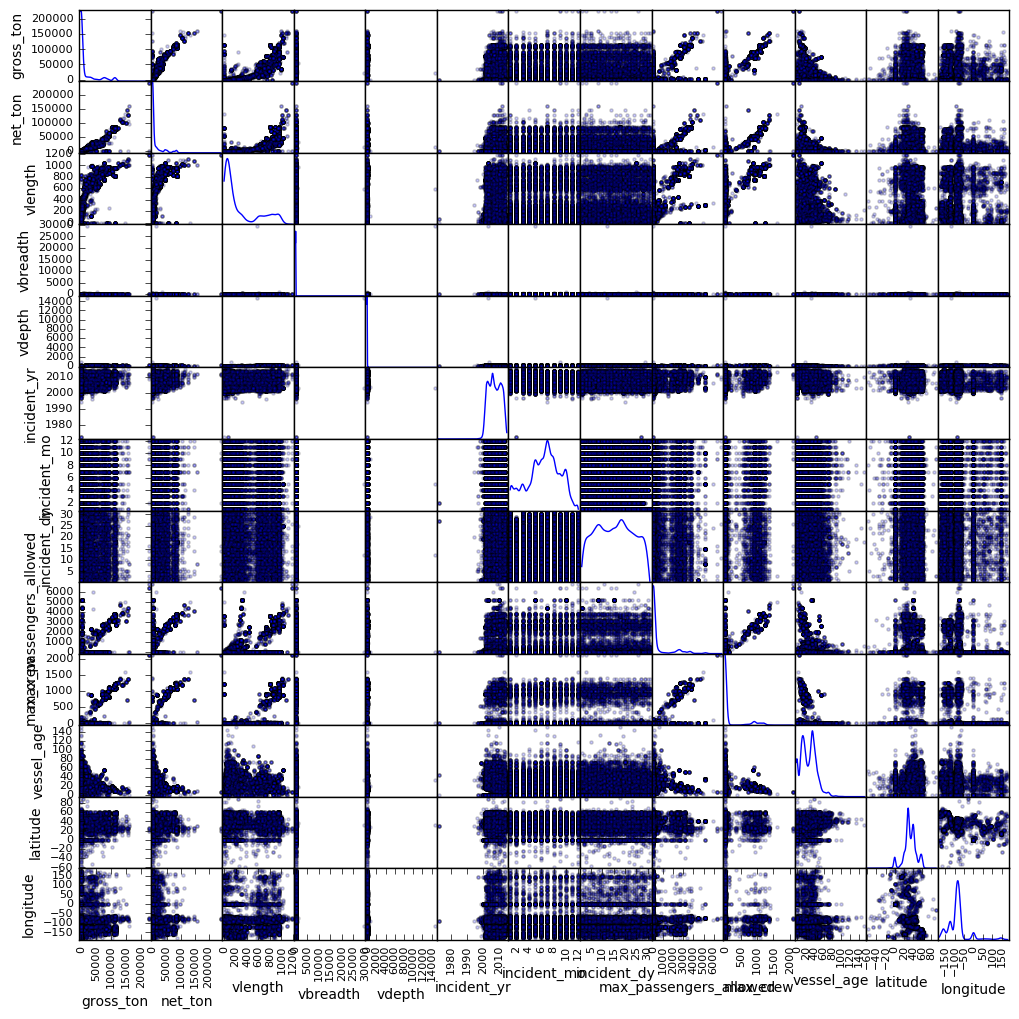

In [31]:
# Create a scatter matrix of the dataframe features
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

## RadViz
Once you move into attempting to visualize more than three dimensions, things get a bit tricky. The radviz plot attempts to create clusters of points by pulling them towards an outer ring.

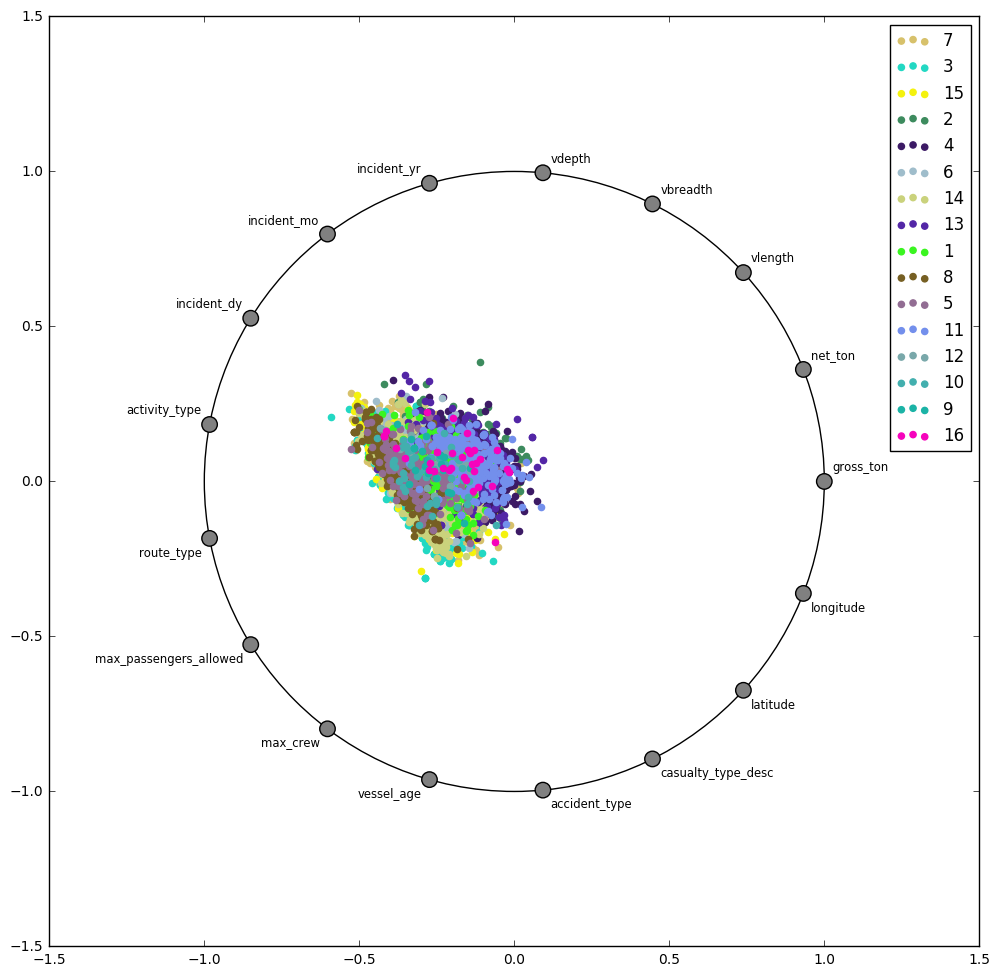

In [33]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'vessel_class')
plt.show()

## Parallel Coordinates
Parallel coordinates intend to do the same thing as the radviz, but instead of having a circle with the dimensions, extend those dimensions out along the horizontal access.

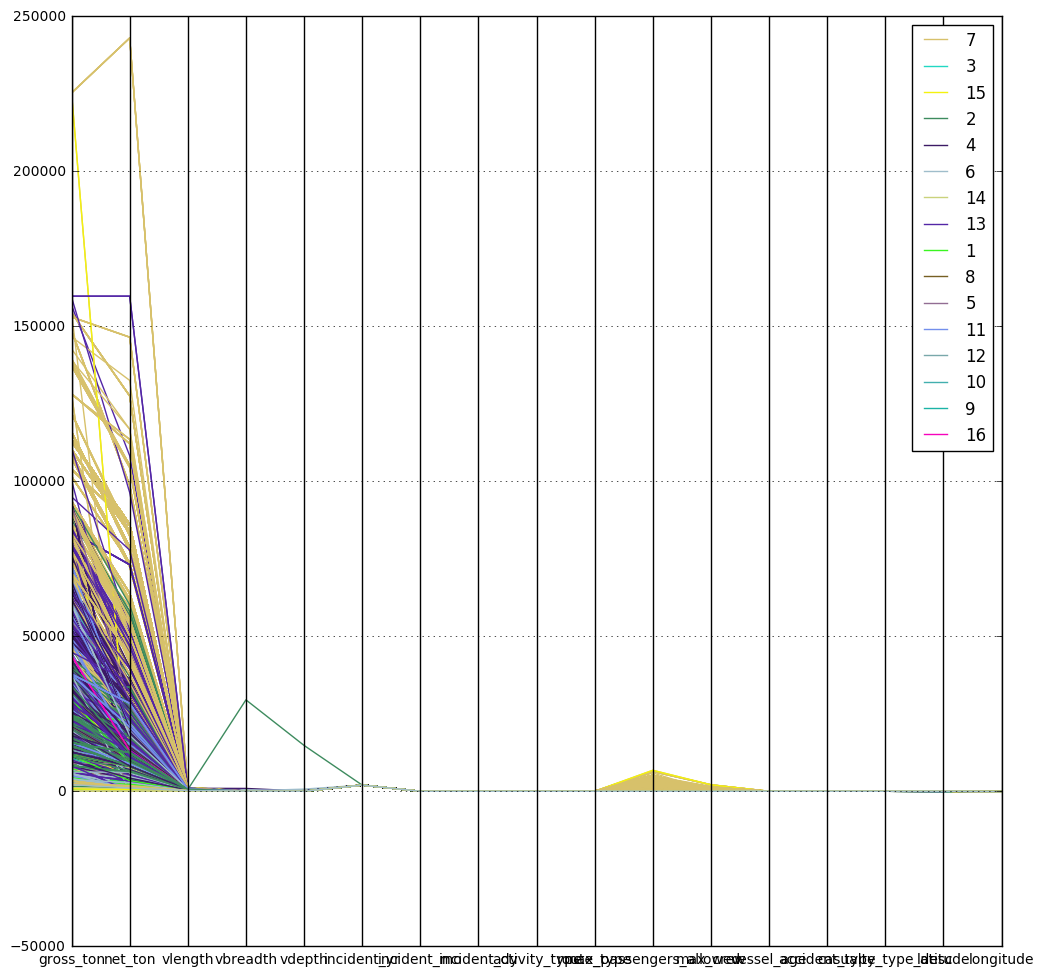

In [42]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'vessel_class')
plt.show()

## Histogram
Vessel age distribution

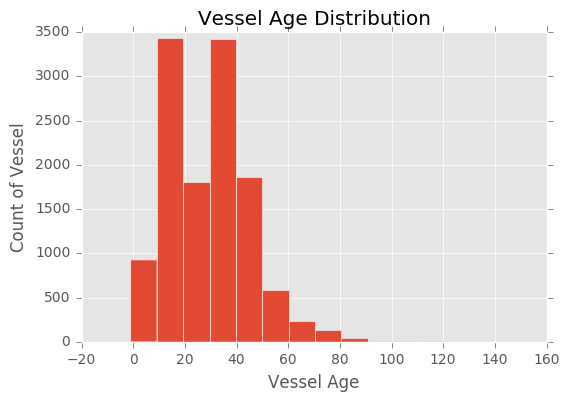

In [63]:
# Visualize the vessel age distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['vessel_age'], bins = 15, range = (df['vessel_age'].min(),df['vessel_age'].max()))
plt.title('Vessel Age Distribution')
plt.xlabel('Vessel Age')
plt.ylabel('Count of Vessel')
plt.show()
plt.savefig('Vessel_age_dist.png')

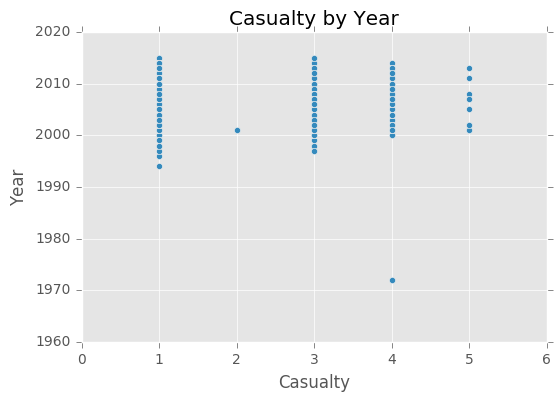

In [78]:
df.plot(x='casualty_type_desc', y='incident_yr', kind='scatter')
plt.title('Casualty by Year')
plt.xlabel('Casualty')
plt.ylabel('Year')
plt.show()

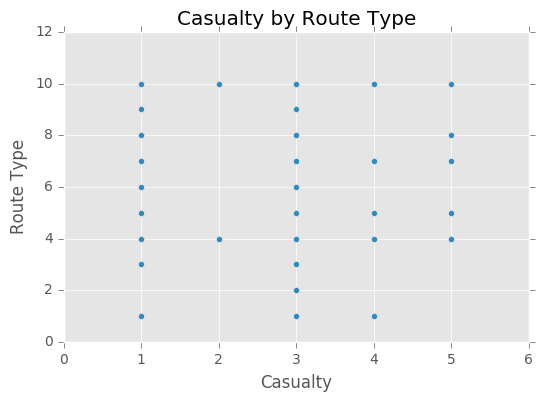

In [79]:
df.plot(x='casualty_type_desc', y='route_type', kind='scatter')
plt.title('Casualty by Route Type')
plt.xlabel('Casualty')
plt.ylabel('Route Type')
plt.show()


In [ ]:
df.plot(x='casualty_type_desc', y='vessel_class', kind='scatter')
plt.show()

## Data Extraction 

In order to manage our data set _on disk_, we'll structure our data as follows:

In [20]:
from sklearn.datasets.base import Bunch

DATA_DIR = os.path.abspath(os.path.join(".", "..", "guproject", "data"))

# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print("- {}".format(name))

- injurydata.txt
- injurydata.xlsx
- meta.json
- MISLEInjurydata.txt
- MISLEInjurydata_clean.txt
- MisleVslInijury_data
- MisleVslInijury_data_1128.txt
- MisleVslInijury_data_clean.txt
- README.md


In [21]:
def load_data(root=DATA_DIR):
    # Construct the `Bunch` for the wheat dataset
    filenames     = {
        'meta': os.path.join(root, 'meta.json'),
        'rdme': os.path.join(root, 'README.md'),
        'data': os.path.join(root, 'MisleVslInijury_data_1128.txt'),
    }

    # Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)
        target_names  = meta['target_names']
        feature_names = meta['feature_names']

    # Load the description from the README. 
    with open(filenames['rdme'], 'r') as f:
        DESCR = f.read()

    # Load the dataset from the text file.
    dataset = np.loadtxt(filenames['data'])

    # Extract the target from the data
    data   = dataset[:, 0:-1]
    target = dataset[:, -1]

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print(dataset.data.shape)
print(dataset.target.shape)

(13794, 15)
(13794,)


## Classification
Now that we have a dataset Bunch loaded and ready, we can begin the classification process. Let's attempt to build a classifier with kNN, SVM, and Random Forest classifiers.

In [114]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [115]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    for train, test in KFold(dataset.data.shape[0], n_folds=12, shuffle=True):
        X_train, X_test = dataset.data[train], dataset.data[test]
        y_train, y_test = dataset.target[train], dataset.target[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
        scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))

    # Report
    print("Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start))
    print("Validation scores are as follows:\n")
    print(pd.DataFrame(scores).mean())
    
    # Write official estimator to disk
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'wb') as f:
        pickle.dump(estimator, f)

    print("\nFitted model written to:\n{}".format(os.path.abspath(outpath)))

In [120]:
# Perform SVC Classification
fit_and_evaluate(dataset, SVC, "Casualty SVM Classifier")

C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Build and Validation of Casualty SVM Classifier took 684.708 seconds
Validation scores are as follows:

accuracy     0.824198
f1           0.770089
precision    0.816567
recall       0.824198
dtype: float64

Fitted model written to:
C:\project\guproject\casualty-svm-classifier.pickle


In [119]:
# Perform kNN Classification
fit_and_evaluate(dataset, KNeighborsClassifier, "Casualty kNN Classifier", n_neighbors=12)

C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Build and Validation of Casualty kNN Classifier took 0.640 seconds
Validation scores are as follows:

accuracy     0.802885
f1           0.771116
precision    0.766347
recall       0.802885
dtype: float64

Fitted model written to:
C:\project\guproject\casualty-knn-classifier.pickle


In [118]:
# Perform Random Forest Classification
fit_and_evaluate(dataset, RandomForestClassifier, "Casualty Random Forest Classifier")

C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metri

Build and Validation of Casualty Random Forest Classifier took 1.858 seconds
Validation scores are as follows:

accuracy     0.871249
f1           0.866893
precision    0.864989
recall       0.871249
dtype: float64

Fitted model written to:
C:\project\guproject\casualty-random-forest-classifier.pickle


C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Regressions
Regressions are a type of supervised learning algorithm, where, given continuous input data, the object is to fit a function that is able to predict the continuous value of input features.
## Linear Regression
Linear regression fits a linear model (a line in two dimensions) to the data.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Fit regression to mislevslincident dataset
model = LinearRegression()
model.fit(dataset.data, dataset.target)

expected  = dataset.target
predicted = model.predict(dataset.data)

# Evaluate fit of the model
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 0.617
Coefficient of Determination: 0.026


# Clustering
Clustering is an unsupervised machine learning method. This means we don't have to have a value we are predicting. You can use clustering when you know this information as well.

In [36]:
from sklearn import manifold
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from time import time

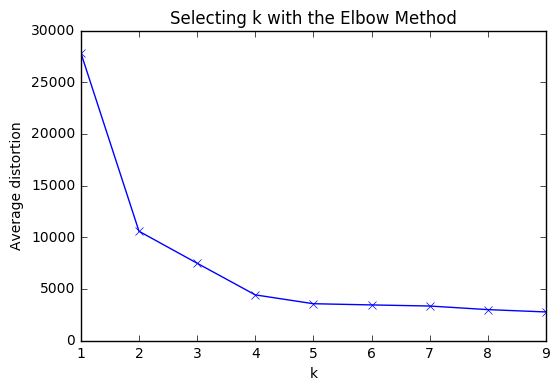

In [26]:
# Code adapted from https://www.packtpub.com/books/content/clustering-k-means
K = range(1,10)
meandistortions = []
X = dataset.data
y = dataset.target

for k in K:
    elbow = KMeans(n_clusters=k, n_jobs=-1, random_state=1)
    elbow.fit(X)
    meandistortions.append(sum(np.min(euclidean_distances(X, elbow.cluster_centers_), axis=1)) / X.shape[0])

    
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

#### Based on our plot, it looks like k=4 and k=5 are worth looking at. 
How do we measure which might be better? We can use the Silhouette Coefficient. A higher Silhouette Coefficient score relates to a model with better defined clusters.

In [28]:
kmeans = KMeans(n_clusters=5, n_jobs=-1, random_state=1)
kmeans.fit(X)
labels = kmeans.labels_
silhouette_score(X, labels, metric='euclidean')

0.83042322272053604

In [29]:
kmeans = KMeans(n_clusters=4, n_jobs=-1, random_state=1)
kmeans.fit(X)
labels = kmeans.labels_
silhouette_score(X, labels, metric='euclidean')

0.83785193185468154

#### We can see above, k=4 has a better score.
As implemented in scikit-learn, KMeans will use 8 clusters by default. Given our data, it makes sense to try this out since our data actually has 8 potential labels (look at "casualty" in the data secription above). Based on the plot above, we should expect the silhouette score for k=8 to be less than for k=4.

In [30]:
kmeans = KMeans(n_clusters=8, n_jobs=-1, random_state=1)
kmeans.fit(X)
labels = kmeans.labels_
silhouette_score(X, labels, metric='euclidean')

0.81389456148420636

We can also visualize what our clusters look like. The function below will plot the clusters and visulaize their silhouette scores.

In [40]:
# Code adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silhouette_plot(X, range_n_clusters = range(2, 12, 2)):

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        ax1.set_xlim([-.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.852464492432


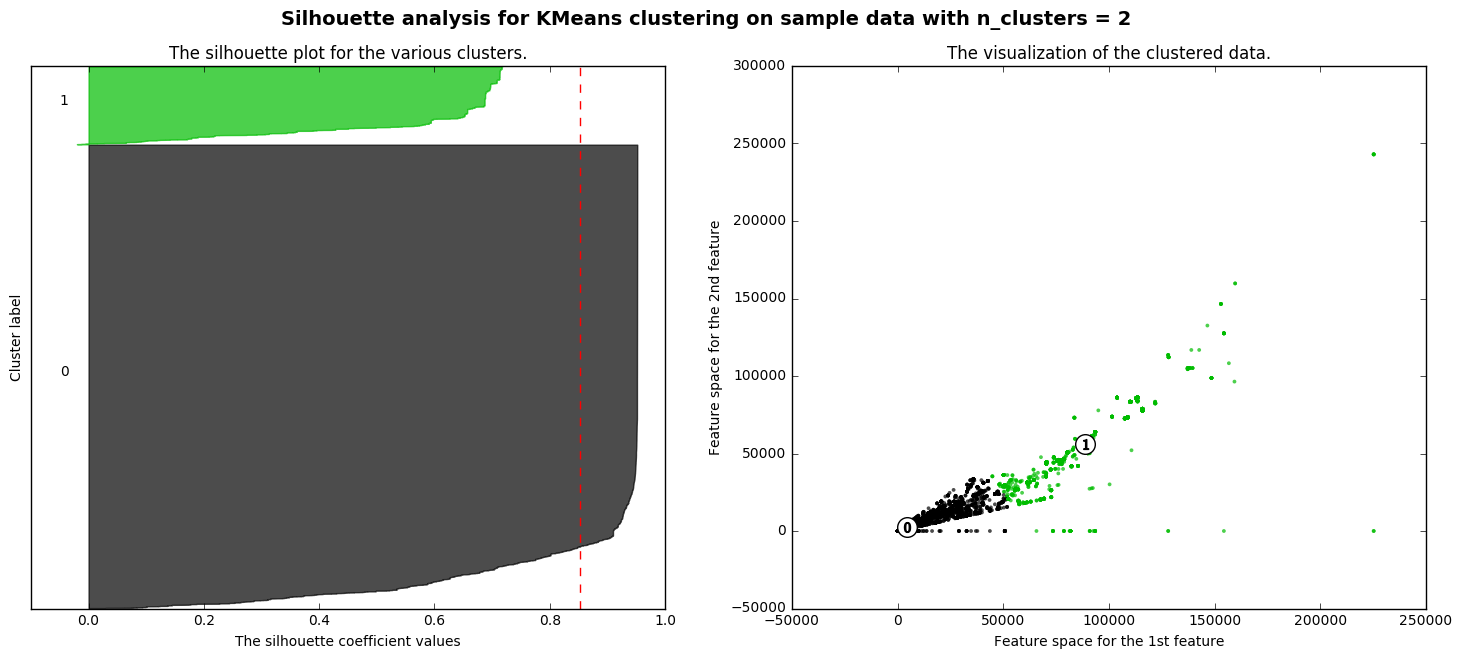

For n_clusters = 4 The average silhouette_score is : 0.837851931855


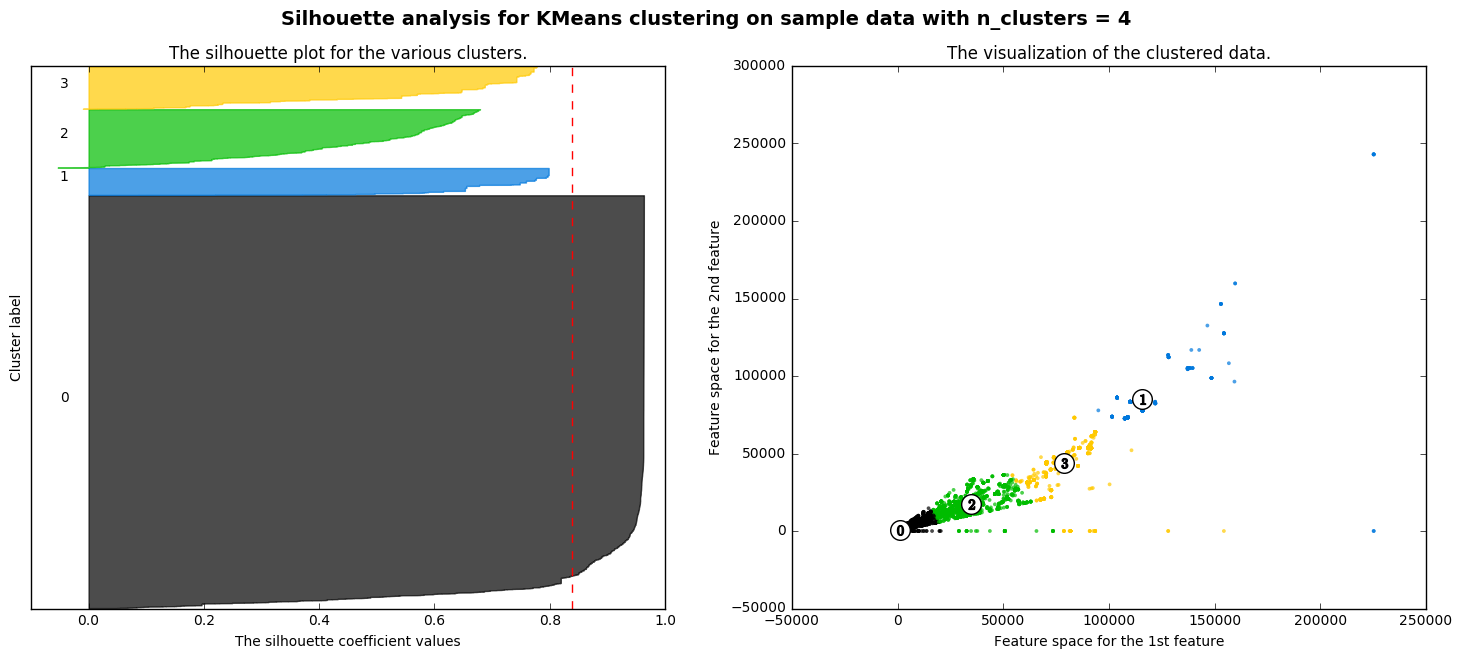

For n_clusters = 6 The average silhouette_score is : 0.833046786373


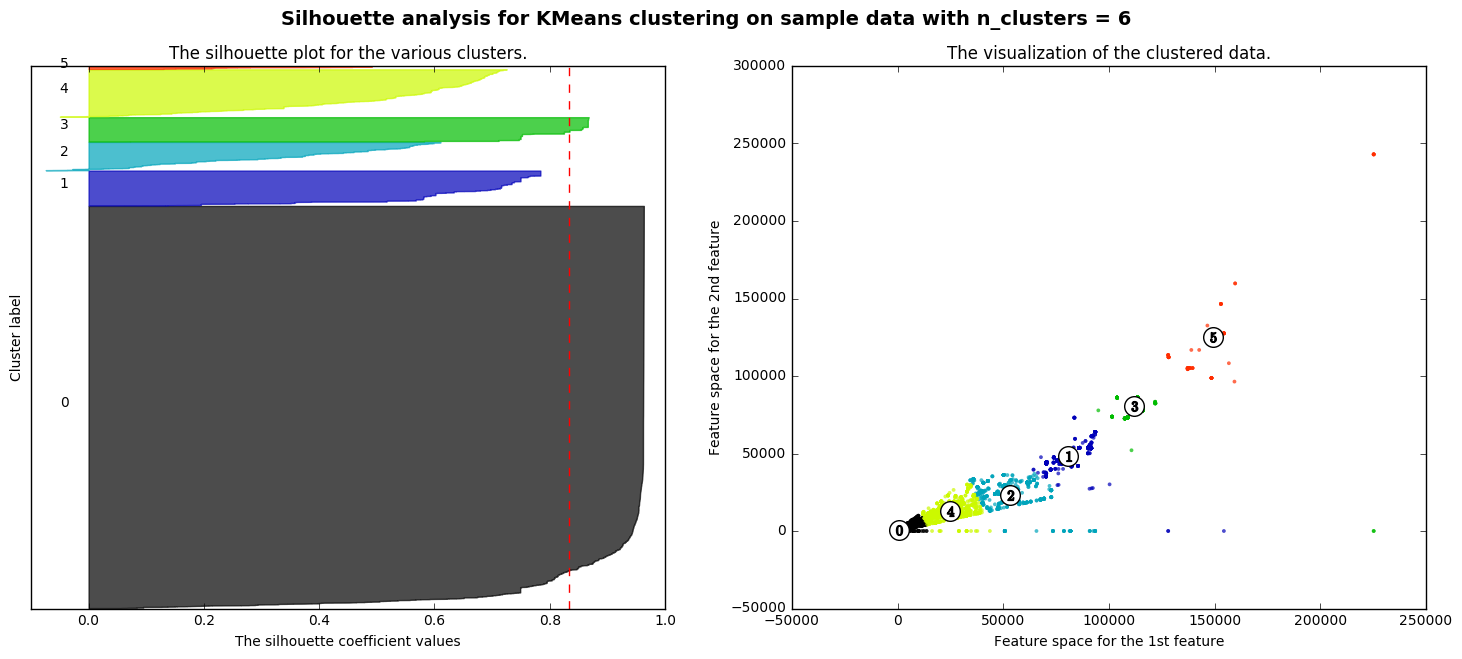

For n_clusters = 8 The average silhouette_score is : 0.813894561484


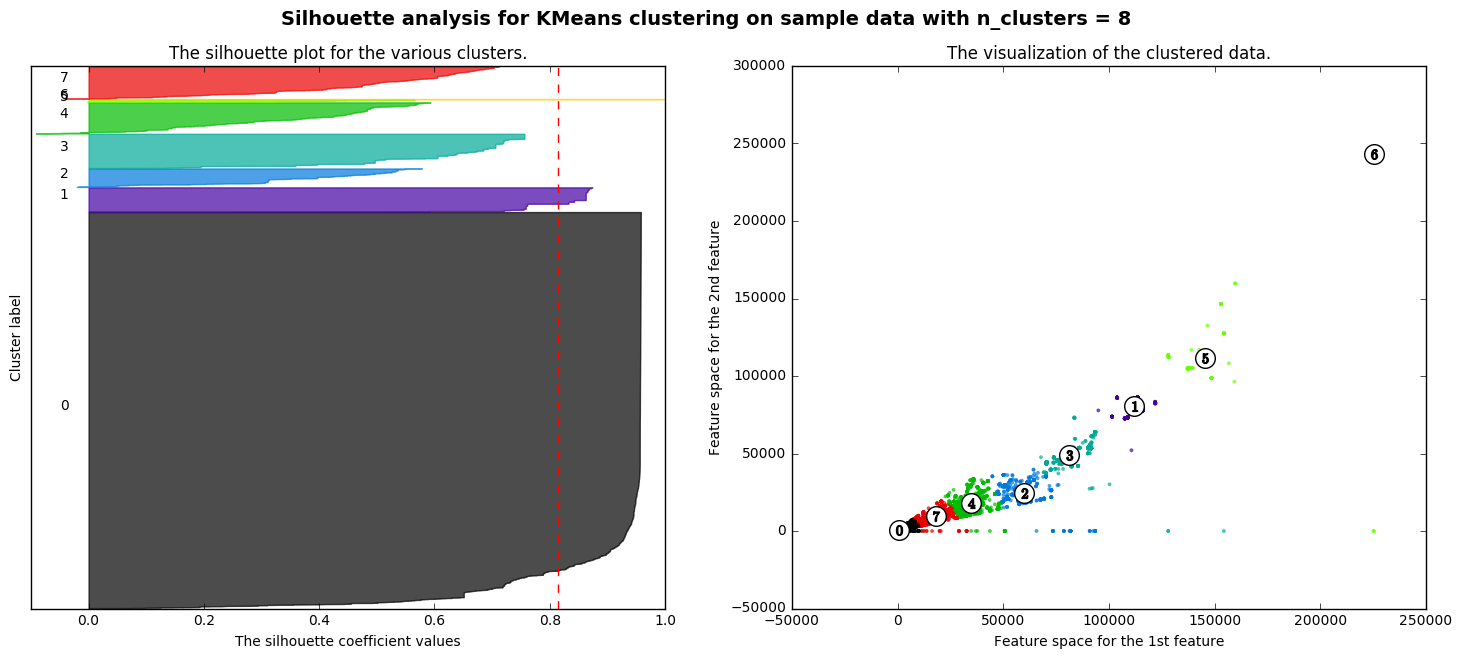

For n_clusters = 10 The average silhouette_score is : 0.81019854131


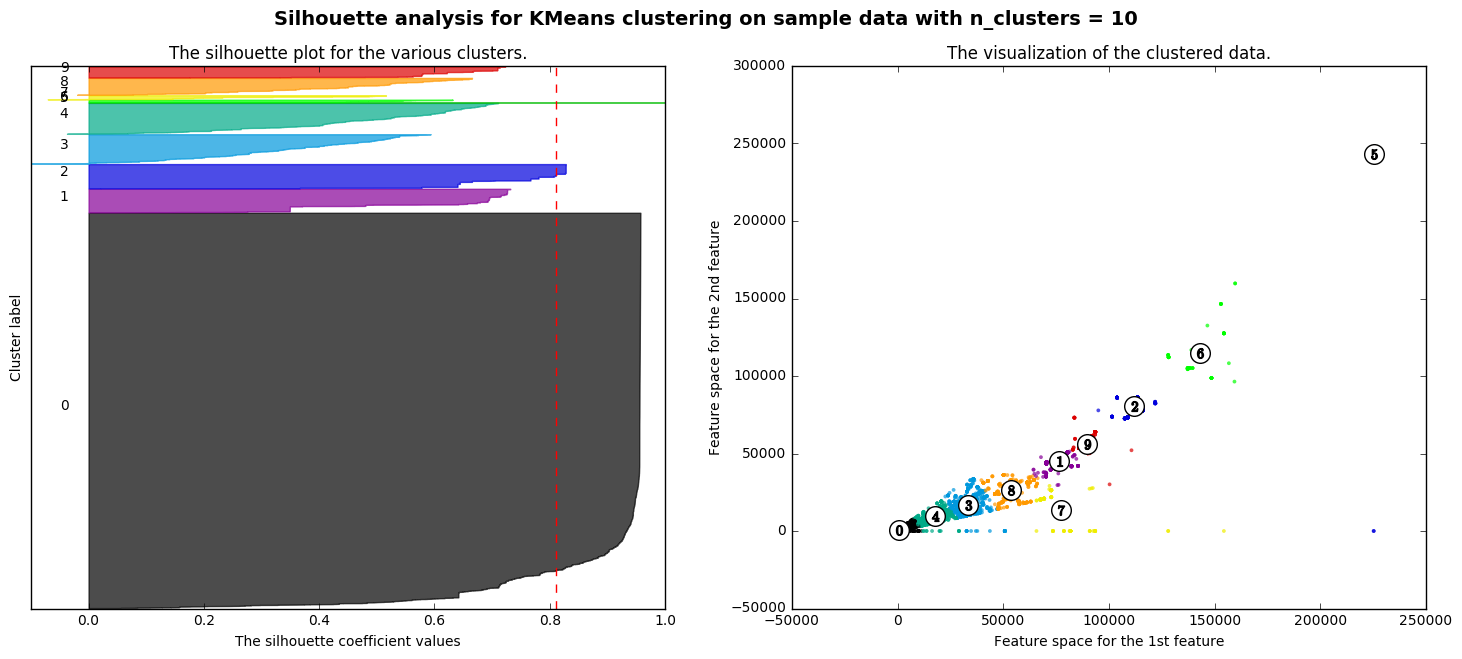

In [41]:
X = dataset.data
silhouette_plot(X)